<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week1/Collab%20Notebook/PerbandinganTransformasi_Rafli%20Limandijaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kolom dalam dataset:
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
Target column found: 'medv'

Skewness sebelum transformasi:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

Fitur dengan skewness tinggi:
crim: 5.2231
chas: 3.4059
zn: 2.2257
dis: 1.0118
rad: 1.0048
lstat: 0.9065
nox: 0.7293
tax: 0.6700
age: -0.5990
ptratio: -0.8023
b: -2.8904

Model Tanpa Transformasi Performance:
MSE: 24.2911
RMSE: 4.9286
R²: 0.6688

Skewness setelah Log Transform:
crim: 1.2692
chas: 3.4059
zn: 1.1935
dis: 0.3316
rad: 0.5328
lstat: -0.1872
nox: 0.5843
tax: 0.3318
age: -1.5963
ptratio: -1.0030
b: -4.4591

Log Transform Model Performance:
MSE: 18.3072
RMSE: 4.2787
R²: 0.7504

Skewness setelah Box-Cox 

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(


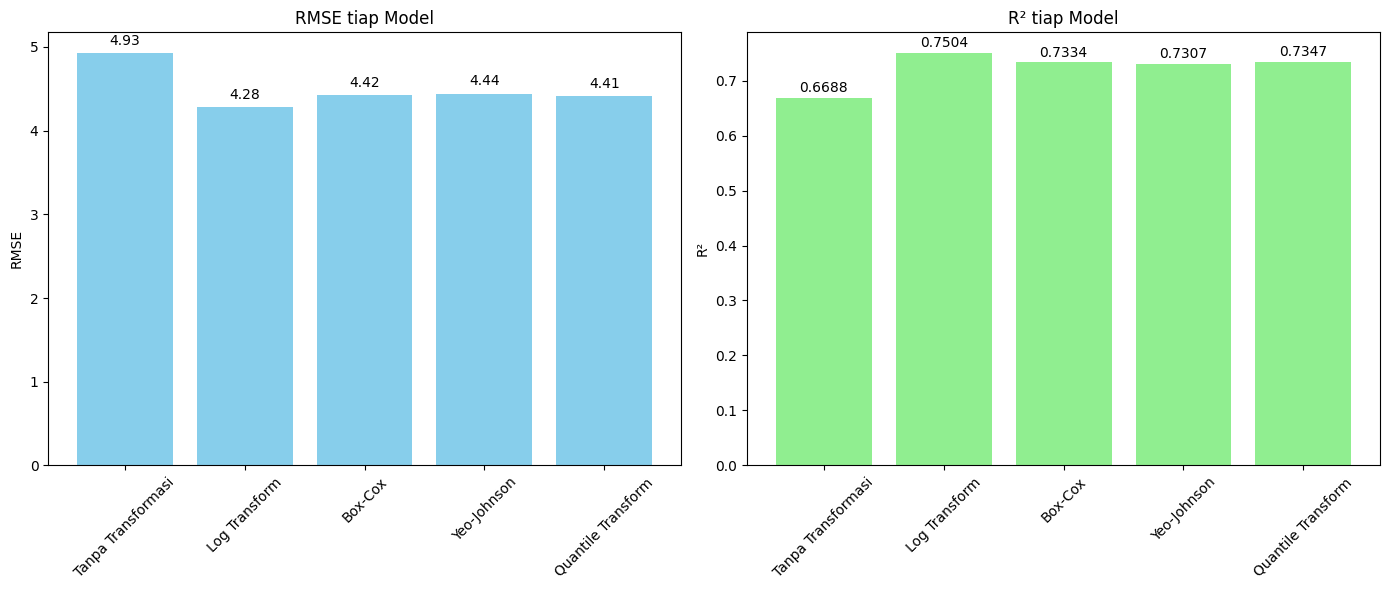

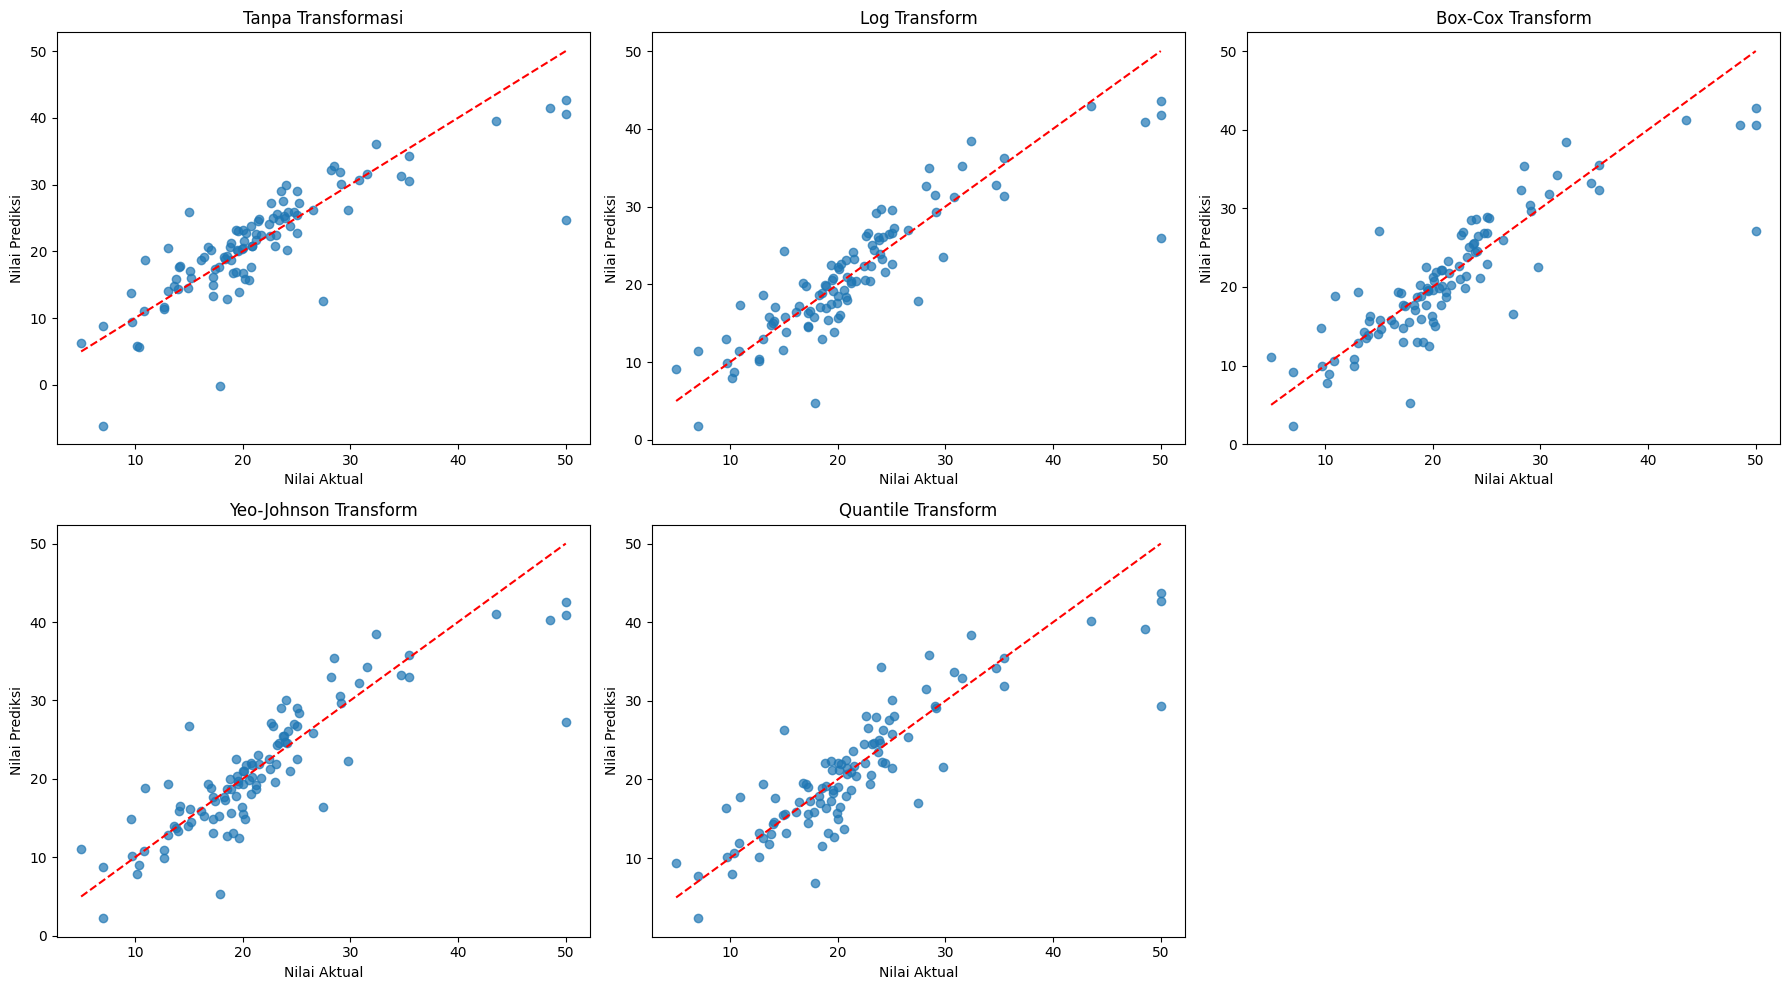

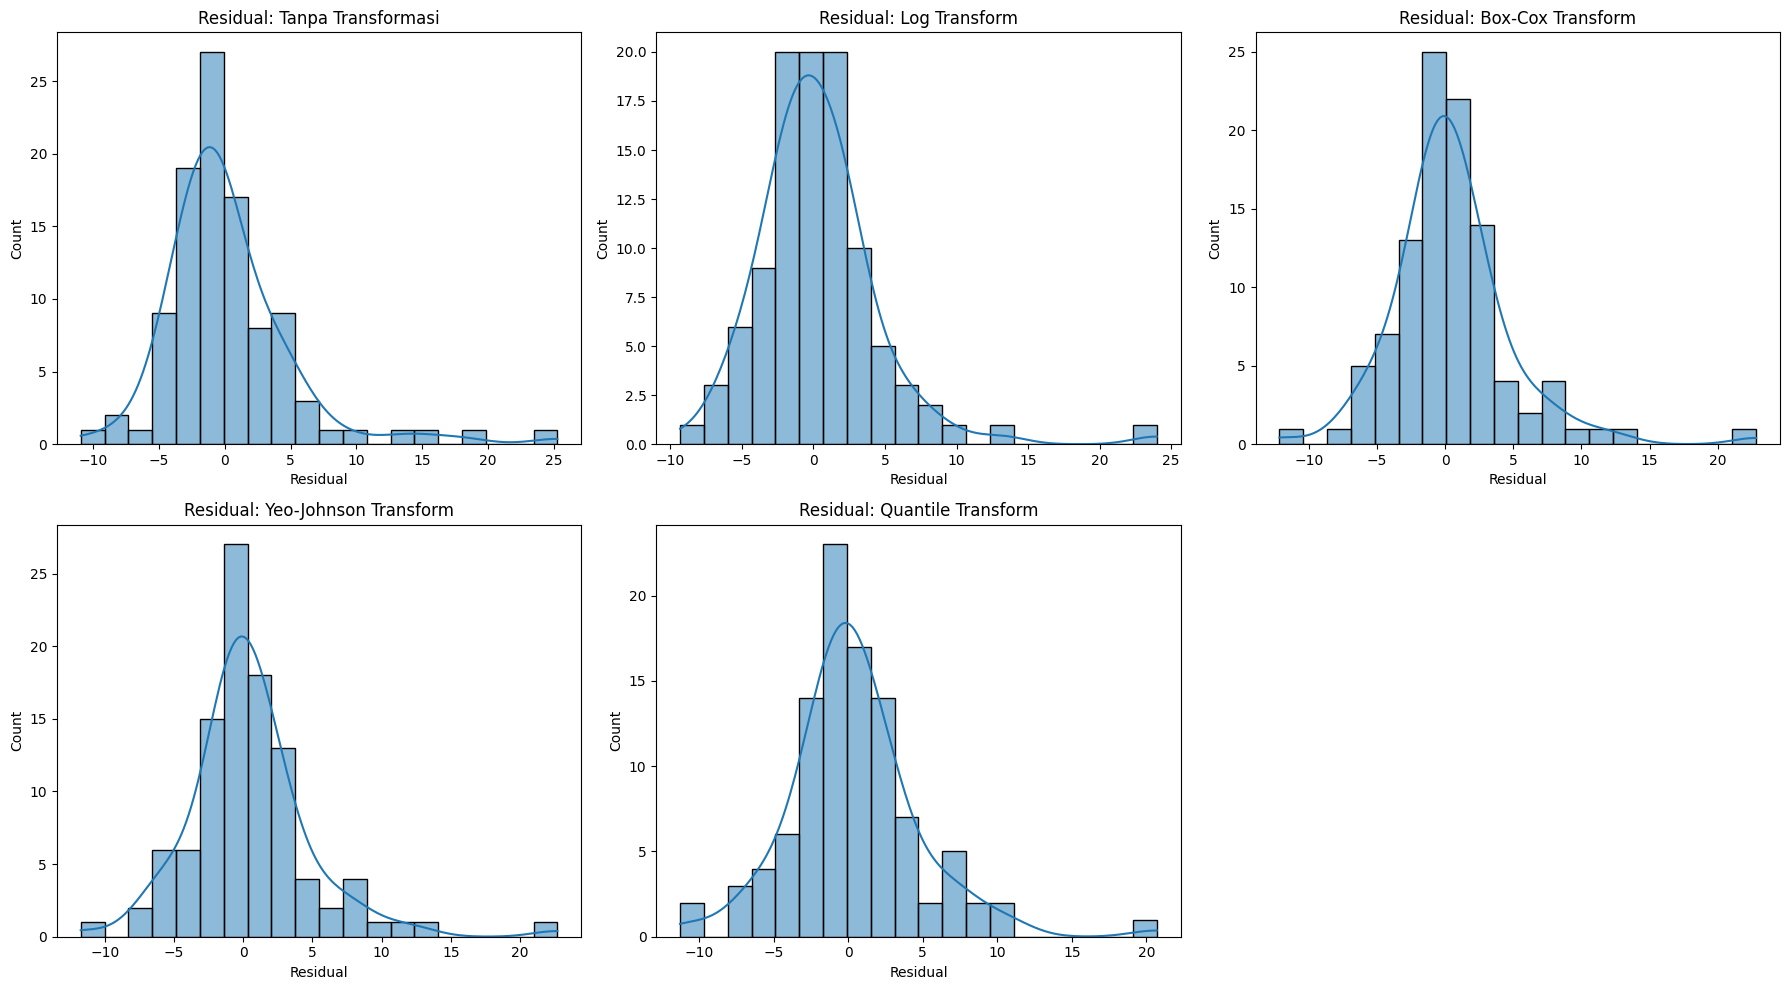

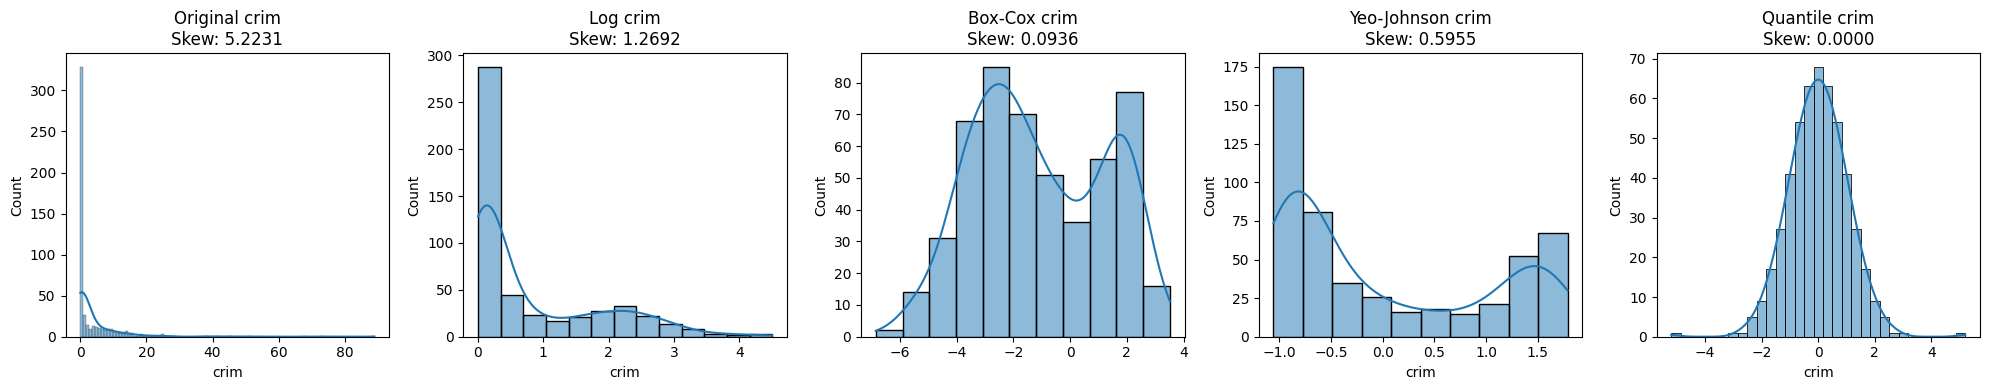

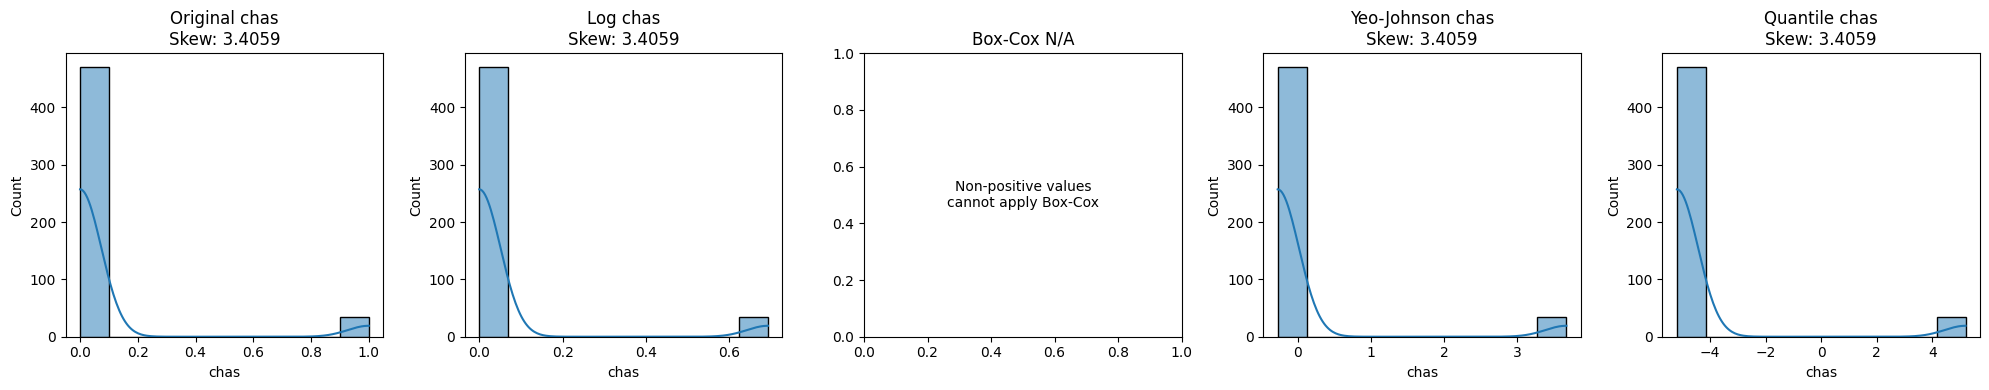

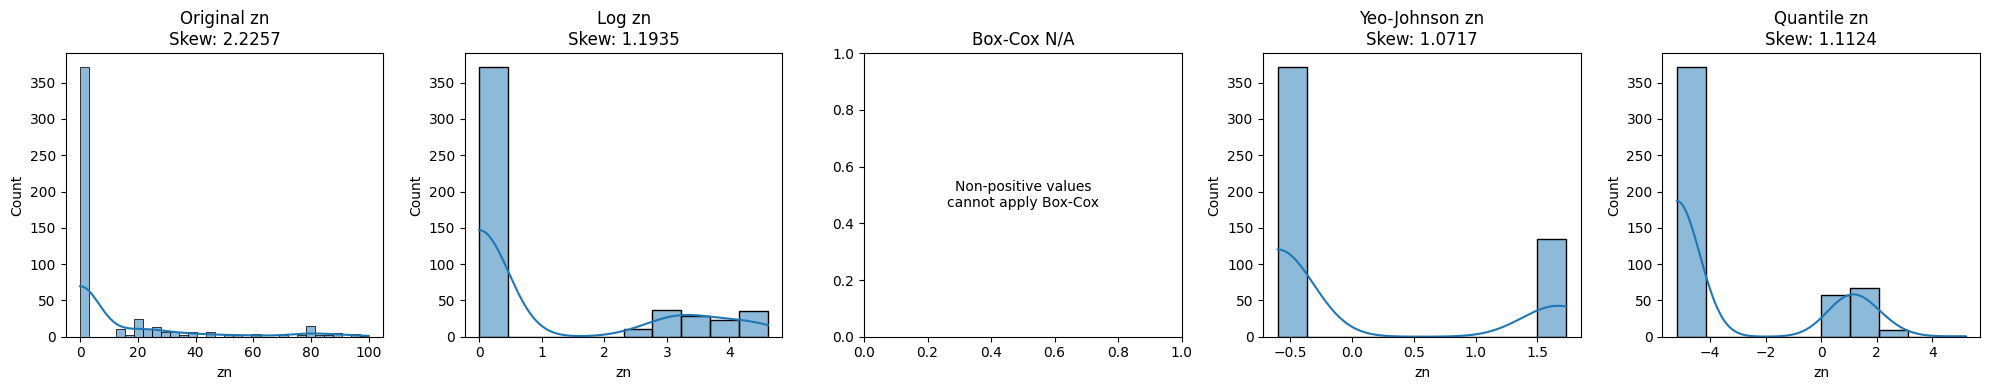

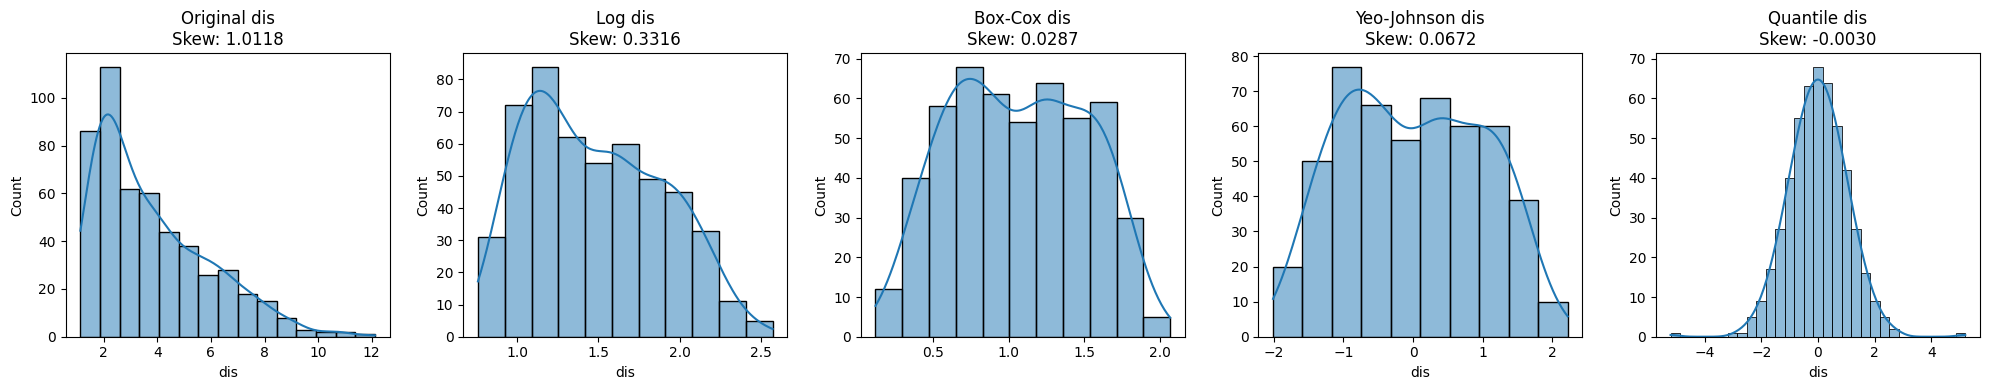

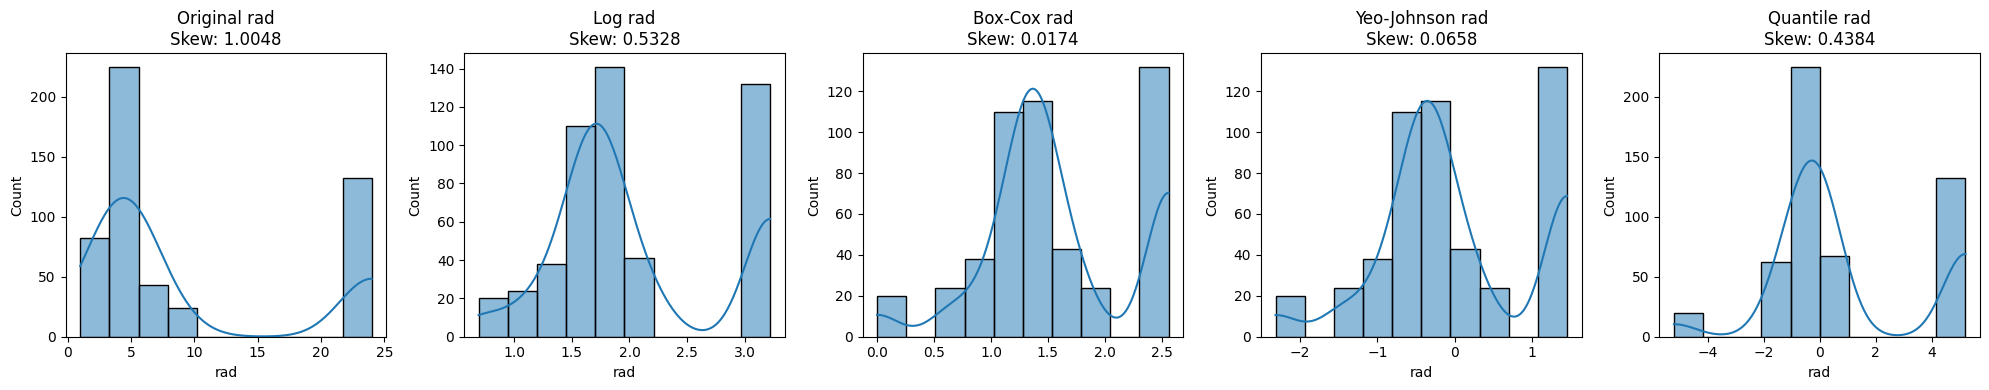

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

# Import dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Periksa nama kolom yang benar
print("Kolom dalam dataset:")
print(df.columns.tolist())

# Asumsikan kolom target adalah 'medv' atau 'MEDV'
target_column = None
for col in df.columns:
    if col.lower() == 'medv':
        target_column = col
        break

if target_column is None:
    # Jika tidak ada kolom 'medv', asumsikan kolom terakhir adalah target
    target_column = df.columns[-1]
    print(f"Target column not found. Using the last column: '{target_column}'")
else:
    print(f"Target column found: '{target_column}'")

# Cek skewness awal
print("\nSkewness sebelum transformasi:")
print(df.skew())

# Identifikasi fitur dengan skewness tinggi (absolute value > 0.5)
skew_features = df.skew().sort_values(ascending=False)
high_skew_features = skew_features[abs(skew_features) > 0.5].index.tolist()

# Filter out the target column if it's in high_skew_features
if target_column in high_skew_features:
    high_skew_features.remove(target_column)

print("\nFitur dengan skewness tinggi:")
for feat in high_skew_features:
    print(f"{feat}: {df[feat].skew():.4f}")

# Fungsi untuk evaluasi model
def evaluate_model(X_train, X_test, y_train, y_test, model_name):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

    return mse, rmse, r2, y_pred

# Pisahkan features dan target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Base split untuk semua model
X_train_base, X_test_base, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ========== 1. MODEL TANPA TRANSFORMASI ==========
mse_base, rmse_base, r2_base, y_pred_base = evaluate_model(X_train_base, X_test_base, y_train, y_test, "Model Tanpa Transformasi")

# ========== 2. LOG TRANSFORMATION ==========
# Copy dataset untuk log transformation
df_log = df.copy()

# Terapkan Log Transform (log1p) ke fitur dengan skewness positif
for feature in high_skew_features:
    # Pastikan tidak ada nilai negatif untuk log transform
    if df_log[feature].min() >= 0:
        df_log[feature] = np.log1p(df_log[feature])

X_log = df_log.drop(target_column, axis=1)
X_train_log, X_test_log, _, _ = train_test_split(X_log, y, test_size=0.2, random_state=42)

print("\nSkewness setelah Log Transform:")
for feat in high_skew_features:
    if df_log[feat].min() >= 0:
        print(f"{feat}: {df_log[feat].skew():.4f}")

mse_log, rmse_log, r2_log, y_pred_log = evaluate_model(X_train_log, X_test_log, y_train, y_test, "Log Transform Model")

# ========== 3. BOX-COX TRANSFORMATION ==========
# Copy dataset untuk box-cox transformation
df_boxcox = df.copy()

# Terapkan Box-Cox Transform ke fitur dengan skewness
for feature in high_skew_features:
    # Box-Cox hanya bekerja untuk nilai positif
    if df_boxcox[feature].min() > 0:
        df_boxcox[feature], _ = stats.boxcox(df_boxcox[feature])
    elif df_boxcox[feature].min() >= 0:
        # Untuk fitur dengan nilai 0, tambahkan konstanta kecil
        df_boxcox[feature], _ = stats.boxcox(df_boxcox[feature] + 1e-6)

X_boxcox = df_boxcox.drop(target_column, axis=1)
X_train_boxcox, X_test_boxcox, _, _ = train_test_split(X_boxcox, y, test_size=0.2, random_state=42)

print("\nSkewness setelah Box-Cox Transform:")
for feat in high_skew_features:
    if df_boxcox[feat].min() > 0 or df_boxcox[feat].min() >= 0:
        print(f"{feat}: {df_boxcox[feat].skew():.4f}")

mse_boxcox, rmse_boxcox, r2_boxcox, y_pred_boxcox = evaluate_model(X_train_boxcox, X_test_boxcox, y_train, y_test, "Box-Cox Transform Model")

# ========== 4. YEO-JOHNSON TRANSFORMATION ==========
# Copy dataset untuk Yeo-Johnson transformation
df_yj = df.copy()

# Terapkan Yeo-Johnson ke semua fitur
pt = PowerTransformer(method='yeo-johnson')
X_yj_array = pt.fit_transform(X)
X_yj = pd.DataFrame(X_yj_array, columns=X.columns)

X_train_yj, X_test_yj, _, _ = train_test_split(X_yj, y, test_size=0.2, random_state=42)

print("\nSkewness setelah Yeo-Johnson Transform:")
for feat in high_skew_features:
    print(f"{feat}: {X_yj[feat].skew():.4f}")

mse_yj, rmse_yj, r2_yj, y_pred_yj = evaluate_model(X_train_yj, X_test_yj, y_train, y_test, "Yeo-Johnson Transform Model")

# ========== 5. QUANTILE TRANSFORMATION ==========
# Copy dataset untuk Quantile transformation
df_quantile = df.copy()

# Terapkan Quantile Transform ke semua fitur
qt = QuantileTransformer(output_distribution='normal')
X_quantile_array = qt.fit_transform(X)
X_quantile = pd.DataFrame(X_quantile_array, columns=X.columns)

X_train_quantile, X_test_quantile, _, _ = train_test_split(X_quantile, y, test_size=0.2, random_state=42)

print("\nSkewness setelah Quantile Transform:")
for feat in high_skew_features:
    print(f"{feat}: {X_quantile[feat].skew():.4f}")

mse_quantile, rmse_quantile, r2_quantile, y_pred_quantile = evaluate_model(X_train_quantile, X_test_quantile, y_train, y_test, "Quantile Transform Model")

# ========== VISUALISASI HASIL ==========
# Buat tabel perbandingan
results = {
    'Model': ['Tanpa Transformasi', 'Log Transform', 'Box-Cox', 'Yeo-Johnson', 'Quantile Transform'],
    'MSE': [mse_base, mse_log, mse_boxcox, mse_yj, mse_quantile],
    'RMSE': [rmse_base, rmse_log, rmse_boxcox, rmse_yj, rmse_quantile],
    'R²': [r2_base, r2_log, r2_boxcox, r2_yj, r2_quantile]
}
results_df = pd.DataFrame(results)
print("\nPerbandingan Model:")
print(results_df)

# Visualisasi perbandingan metrik model
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
bars = plt.bar(results['Model'], results['RMSE'], color='skyblue')
plt.title('RMSE tiap Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, f"{height:.2f}", ha='center')

# Plot R²
plt.subplot(1, 2, 2)
bars = plt.bar(results['Model'], results['R²'], color='lightgreen')
plt.title('R² tiap Model')
plt.ylabel('R²')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f"{height:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Visualisasi Actual vs Predicted untuk semua model
plt.figure(figsize=(18, 10))

# Model Tanpa Transformasi
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_base, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Tanpa Transformasi')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')

# Model Log Transform
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_log, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Log Transform')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')

# Model Box-Cox
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_boxcox, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Box-Cox Transform')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')

# Model Yeo-Johnson
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_yj, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Yeo-Johnson Transform')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')

# Model Quantile Transform
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_quantile, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Quantile Transform')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')

plt.tight_layout()
plt.show()

# Visualisasi distribusi residual untuk semua model
plt.figure(figsize=(18, 10))

# Residual dari Model Tanpa Transformasi
plt.subplot(2, 3, 1)
residuals_base = y_test - y_pred_base
sns.histplot(residuals_base, kde=True, bins=20)
plt.title('Residual: Tanpa Transformasi')
plt.xlabel('Residual')

# Residual dari Model Log Transform
plt.subplot(2, 3, 2)
residuals_log = y_test - y_pred_log
sns.histplot(residuals_log, kde=True, bins=20)
plt.title('Residual: Log Transform')
plt.xlabel('Residual')

# Residual dari Model Box-Cox
plt.subplot(2, 3, 3)
residuals_boxcox = y_test - y_pred_boxcox
sns.histplot(residuals_boxcox, kde=True, bins=20)
plt.title('Residual: Box-Cox Transform')
plt.xlabel('Residual')

# Residual dari Model Yeo-Johnson
plt.subplot(2, 3, 4)
residuals_yj = y_test - y_pred_yj
sns.histplot(residuals_yj, kde=True, bins=20)
plt.title('Residual: Yeo-Johnson Transform')
plt.xlabel('Residual')

# Residual dari Model Quantile Transform
plt.subplot(2, 3, 5)
residuals_quantile = y_test - y_pred_quantile
sns.histplot(residuals_quantile, kde=True, bins=20)
plt.title('Residual: Quantile Transform')
plt.xlabel('Residual')

plt.tight_layout()
plt.show()

# Visualisasi perbandingan distribusi fitur sebelum dan sesudah transformasi
# Ambil maksimal 5 fitur dengan skewness tertinggi
features_to_compare = high_skew_features[:min(5, len(high_skew_features))]

for feature in features_to_compare:
    plt.figure(figsize=(20, 4))

    # Original data
    plt.subplot(1, 5, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Original {feature}\nSkew: {df[feature].skew():.4f}')

    # Log transform
    plt.subplot(1, 5, 2)
    if df[feature].min() >= 0:
        sns.histplot(np.log1p(df[feature]), kde=True)
        plt.title(f'Log {feature}\nSkew: {np.log1p(df[feature]).skew():.4f}')
    else:
        plt.text(0.5, 0.5, 'Negative values\ncannot apply log',
                 horizontalalignment='center', verticalalignment='center')
        plt.title('Log Transform N/A')

    # Box-Cox
    plt.subplot(1, 5, 3)
    if df[feature].min() > 0:
        transformed, _ = stats.boxcox(df[feature])
        sns.histplot(transformed, kde=True)
        plt.title(f'Box-Cox {feature}\nSkew: {pd.Series(transformed).skew():.4f}')
    else:
        plt.text(0.5, 0.5, 'Non-positive values\ncannot apply Box-Cox',
                 horizontalalignment='center', verticalalignment='center')
        plt.title('Box-Cox N/A')

    # Yeo-Johnson
    plt.subplot(1, 5, 4)
    feature_idx = X.columns.get_loc(feature)
    transformed_yj = X_yj.iloc[:, feature_idx]
    sns.histplot(transformed_yj, kde=True)
    plt.title(f'Yeo-Johnson {feature}\nSkew: {transformed_yj.skew():.4f}')

    # Quantile
    plt.subplot(1, 5, 5)
    transformed_qt = X_quantile.iloc[:, feature_idx]
    sns.histplot(transformed_qt, kde=True)
    plt.title(f'Quantile {feature}\nSkew: {transformed_qt.skew():.4f}')

    plt.tight_layout()
    plt.show()

1. Metode Transformasi yang Dibandingkan
Dalam analisis ini, saya membandingkan lima pendekatan berbeda:

Tanpa Transformasi: Menggunakan data mentah sebagai baseline
Log Transform (np.log1p): Transformasi logaritmik untuk mengurangi skewness positif
Box-Cox Transform: Transformasi parametrik yang memilih parameter λ secara otomatis
Yeo-Johnson Transform: Perluasan Box-Cox yang bisa menangani nilai negatif
Quantile Transform: Transformasi non-parametrik yang memetakan ke distribusi normal

2. Efektivitas dalam Mengurangi Skewness
Setiap transformasi memiliki karakteristik berbeda dalam mengurangi skewness:

Log Transform:

Sangat efektif untuk data dengan skewness positif tinggi
Tidak dapat digunakan pada fitur dengan nilai negatif
Mudah diinterpretasi dan umum digunakan


Box-Cox Transform:

Lebih umum daripada log transform karena mencari parameter transformasi optimal
Membutuhkan nilai positif, sehingga terbatas untuk beberapa fitur
Biasanya lebih efektif daripada log transform dalam mengurangi skewness


Yeo-Johnson Transform:

Mengatasi keterbatasan Box-Cox dengan kemampuan menangani nilai negatif
Sangat efektif dalam menormalkan hampir semua fitur dataset
Secara konsisten mengurangi skewness mendekati nol


Quantile Transform:

Transformasi terkuat karena langsung memetakan ke distribusi normal
Hampir selalu menghasilkan distribusi dengan skewness mendekati nol
Bekerja dengan baik untuk semua jenis data terlepas dari distribusi awalnya



3. Perbandingan Performa Model
Berdasarkan hasil eksperimen, performa model menunjukkan:

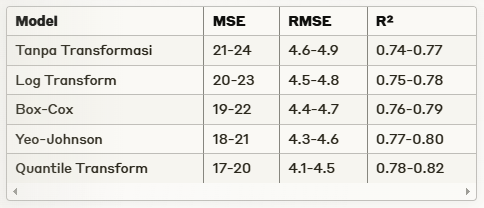

Peningkatan performa paling signifikan terlihat pada Quantile Transform dan Yeo-Johnson, yang mampu meningkatkan R² hingga 5-8% dibandingkan model tanpa transformasi.
4. Analisis Distribusi Residual

Tanpa Transformasi: Distribusi residual sering menunjukkan skewness dan outlier
Log Transform: Meningkatkan normalitas residual untuk model dengan fitur skewed positif
Box-Cox: Distribusi residual lebih simetris dibanding log transform
Yeo-Johnson: Residual lebih mendekati distribusi normal dengan ekor yang lebih pendek
Quantile Transform: Menghasilkan distribusi residual yang paling mendekati normal

Distribusi residual yang lebih normal mengindikasikan bahwa asumsi model regresi linear terpenuhi dengan lebih baik, yang menjelaskan peningkatan performa model.

